1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
#from math import sum

def converter(num, x):
    
    #from binary:
    
    if x == 'bin': 
        while len(num)%4 != 0: num = '0' + num
        l = len(num)
        k = l//4
        y = 0
        c = []
        for i in range(l):
            y += pow(2,l-i-1)*int(num[i])
            
        j = 0
        while j < k:
            sublist = [int(num[j*4+i]) for i in range(4)]
            s = 0
            for i in range(4):
                s += pow(2,3-i)*int(sublist[i])
            if s<10: c.append(str(s))
            elif s == 10: c.append('A')
            elif s == 11: c.append('B')
            elif s == 12: c.append('C')
            elif s == 13: c.append('D')
            elif s == 14: c.append('E')
            elif s == 15: c.append('F')
            j += 1
        z = ''
        for i in range(len(c)): z += c[i]
        print('decimal representation:', y)   
        print('hexadecimal representation:', z)  
    
    
    
    #from decimal:
    
    elif x == 'dec':
        n = 0                                        #number of necessary bits
        while int(num)//pow(2,n)>0: n+=1
        l = ''
        data = int(num)
        for i in range(n):
            if data/pow(2,n-i-1) >= 1: 
                l += '1'
                data -= pow(2,n-i-1)
            else: l += '0'    
        print('binary representation: ', l)
        
        while len(l)%4 != 0: l = '0' + l
        k = len(l)/4
        j = 0
        c = []
        while j < k:
            sublist = [int(l[j*4+i]) for i in range(4)]
            s = 0
            for i in range(4):
                s += pow(2,3-i)*int(sublist[i])
            if s<10: c.append(str(s))
            elif s == 10: c.append('A')
            elif s == 11: c.append('B')
            elif s == 12: c.append('C')
            elif s == 13: c.append('D')
            elif s == 14: c.append('E')
            elif s == 15: c.append('F')
            j += 1
        z = ''
        for i in range(len(c)): z += c[i]
        print('hexadecimal representation:', z)  
        
        
    
    
    
    
    #from hexadecimal:
    
    elif x == 'hex':
        n = len(num)
        total = 0
        for i in range(n):
            if num[i] == 'A': total += pow(16,n-i-1)*10
            elif num[i] == 'B': total += pow(16,n-i-1)*11
            elif num[i] == 'C': total += pow(16,n-i-1)*12
            elif num[i] == 'D': total += pow(16,n-i-1)*13
            elif num[i] == 'E': total += pow(16,n-i-1)*14
            elif num[i] == 'F': total += pow(16,n-i-1)*15
            else: total += pow(16,n-i-1)*int(num[i])
        print('decimal representation:', total)
        
        m = 0                                        #number of necessary bits
        while total//pow(2,m)>0: m+=1
        l = ''
        for i in range(m):
            if total/pow(2,m-i-1) >= 1: 
                l += '1'
                total -= pow(2,m-i-1)
            else: l += '0'    
        print('binary representation: ', l)
        
            
    

#num = input('input integer number: ')
#x = input('input type (bin/dec/hex): ')
num = '10111010111'
x = 'bin'
converter(num, x)



decimal representation: 1495
hexadecimal representation: 5D7


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
#s = input('insert string: ')
s = '01000110100100100100011000000000'
if len(s) != 32: print('error: input file is not 32 bit')

exp = 0
for i in range(1,9): exp += int(s[i])*pow(2,8-i)  #load exp numbers
exp -= 127
mantissa = 1
for i in range(1,24): mantissa += int(s[8+i])*pow(2,-i)   #load mantissa
result = pow(-1,int(s[0]))*pow(2,exp)*mantissa  #set result
print('output number:', result)

output number: 18723.0


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [3]:
from math import log2

up,down = 1,1
double = up*2
half = down/2

while double>up and up<pow(2,100000):      #condition for underflow: the maximum number which double value is wrongly expressed
    double *=2 
    up *=2
print('double > up for number below 2^',log2(up))

#Since there are no hints of overflow even for 100.000 bits, it seems to be legit to assume an infinite precision possible in Python (as referenced in many websites on the topic)

c = 1
while half>0:  #underflow condition: dividing by 2 multiple times will eventually return 0
    c += 1
    half /=2 
print('Number of halvings before resulting zero:',c)

#Detected underflow for values lower than 2^-1075


double > up for number below 2^ 100000.0
Number of halvings before resulting zero: 1075


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [4]:
x,c = 1,1
y = 0
while y != x:
    y = x                        #check when a small change is not noticeable
    x += pow(10,-c)
    c += 1
print('max precision: 10^-',c)

max precision: 10^- 17


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [5]:
from math import sqrt

print('Expected solutions are x(-) = -1.000.000 and x(+) = -1.0005e-6.')
x_1 = -1000000
x_2 = -1.0005e-6

def quadratic(a,b,c):
    delta = pow(b,2) - 4*a*c
    y = ( (-b) + sqrt(delta) )/(2*a)
    x = ( (-b) - sqrt(delta) )/(2*a)
    return x,y


def other_quadratic(a,b,c):
    delta = pow(b,2) - 4*a*c
    y = (2*c )/((-b) - sqrt(delta))
    x = ( 2*c )/((-b) + sqrt(delta))
    return x,y

x,y = quadratic(0.001, 1000, 0.001)
print('\nfirst implementation results:',x,y)
print('relative errors:',(x_1-x)/x_1,(x_2-y)/x_2)

z,t = other_quadratic(0.001, 1000, 0.001)
print('\nsecond implementation results:',z,t)
print('relative errors:',(x_1-z)/x_1,(x_2-t)/x_2)

print('\nThe two results obtained show similar behaviour: the solution with larger absolute value (x(-)) is fairly approximated by the program in both cases, with a relative error extremely negligeble in the first case.')
print('However, the other solution is only slightly similar to the expected value: this is a consequence of the catastrophic cancellation that occurs since sqrt(delta) \sim b, then -b+sqrt(delta) \sim 0.')
print('Changing the formula results in a similar problem, since the same operation is held at the denominator. Anyway, since the estimation of the first root with the first method seems to be quite good, I choose to proceed selecting it as x(-) and then finding x(+) recalling that x(-)*x(+)=c/a:')

def final_quadratic(a,b,c):
    delta = pow(b,2) - 4*a*c
    x = ( (-b) - sqrt(delta) )/(2*a)
    y = (c/a)/x
    return x,y

#this will be the best solution for positive b (i.e, -b + sqrt(delta) sim 0). If b<0, it will be sufficient to switch roles of x(+) and x(-)
#because it will be troubleful the solution closer to 0 in absolute value

k,j = final_quadratic(0.001, 1000, 0.001)
print('\nsecond implementation results:',k,j)
print('relative errors:',(x_1-k)/x_1,(x_2-j)/x_2)


Expected solutions are x(-) = -1.000.000 and x(+) = -1.0005e-6.

first implementation results: -999999.999999 -9.999894245993346e-07
relative errors: 1.0000076144933701e-12 0.0005103202405451222

second implementation results: -1000010.5755125057 -1.000000000001e-06
relative errors: -1.0575512505718507e-05 0.0004997501239379344

The two results obtained show similar behaviour: the solution with larger absolute value (x(-)) is fairly approximated by the program in both cases, with a relative error extremely negligeble in the first case.
However, the other solution is only slightly similar to the expected value: this is a consequence of the catastrophic cancellation that occurs since sqrt(delta) \sim b, then -b+sqrt(delta) \sim 0.
Changing the formula results in a similar problem, since the same operation is held at the denominator. Anyway, since the estimation of the first root with the first method seems to be quite good, I choose to proceed selecting it as x(-) and then finding x(+) r

6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

delta = 10^-2: 1.010000000000001
expected: 1.01
delta = 10^-4: 1.0000999999998899
delta = 10^-6: 1.0000009999177333
delta = 10^-8: 1.0000000039225287
delta = 10^-10: 1.000000082840371
delta = 10^-12: 1.0000889005833413
delta = 10^-14: 0.9992007221626509

The resulting trend is noticeably linear (expected: deriv = delta + 1) between the derivative and delta (and presents a problem of estimation for delta really small (10^-14))


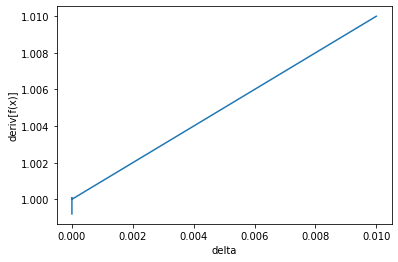

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

def fun(x):
    return x*(x-1)

def deriv(f,x, delta = pow(10,-2)):
    d = (f(x+delta) - f(x)) / delta
    return d

g_1 = deriv(fun, 1)
print('delta = 10^-2:', g_1)
print('expected: 1.01')

g_2 = deriv(fun, 1, pow(10,-4))
g_3 = deriv(fun, 1, pow(10,-6))
g_4 = deriv(fun, 1, pow(10,-8))
g_5 = deriv(fun, 1, pow(10,-10))
g_6 = deriv(fun, 1, pow(10,-12))
g_7 = deriv(fun, 1, pow(10,-14))
print('delta = 10^-4:', g_2)
print('delta = 10^-6:', g_3)
print('delta = 10^-8:', g_4)
print('delta = 10^-10:', g_5)
print('delta = 10^-12:', g_6)
print('delta = 10^-14:', g_7)

deltas = [pow(10,-(2*x)) for x in range(1,8)]
gs = [g_1,g_2,g_3,g_4,g_5,g_6,g_7]

plt.plot(deltas,gs)
plt.xlabel('delta')
plt.ylabel('deriv[f(x)]')

print('\nThe resulting trend is noticeably linear (expected: deriv = delta + 1) between the derivative and delta (and presents a problem of estimation for delta really small (10^-14))')

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [8]:
#a)
import math as m
import timeit

def RiemannInt(f,N):
    dx = 2/N
    x = -1
    I = 0
    for i in range(N): I += dx*f(x+i*dx)
    return I

def semic(x):
    return m.sqrt(1-pow(x,2))



N = 100
I_100 = RiemannInt(semic,N)
real = m.pi/2



print('calculated (N=100):',I_100)
print('expected:', real)
print('difference:',100*(real-I_100)/real, '%')
print('time (N=100):')
%timeit I_100 = RiemannInt(semic,N)

#Estimation for order of magnitude of N:

print('\ntime (N=10.000):')
%timeit I_10k = RiemannInt(semic,N**2)
print('\ntime (N=1.000.000):')
%timeit I_1M = RiemannInt(semic,N**3)
print('\nThe time needed per loop increases linearly with N (multiply N by ten leads to a loop time 10 times bigger)')
print('Therefore, I assume the max N (to stay under 1s) to be about N = 2.000.000 and in fact:')
print('time (N=1.000.000):')
%timeit I_1M = RiemannInt(semic,2*N**3)

print('Following this empirical result, I can fairly say that the maximum N that keeps computation time under a minute will be about 60 * (2*10^6) = 1*10^8')
print('Therefore, best calculated value under a minute: 1.570796326793284 (let run to check)')
print('In this case, the relative error committed in the estimation of I is:')
print('difference: 1.0265416931905805e-10 %')
I_100M = RiemannInt(semic,pow(10,8))
print(I_100M)
print(100*(real-I_100M)/real)
    
    
    

calculated (N=100): 1.5691342555492505
expected: 1.5707963267948966
difference: 0.10581074180619238 %
time (N=100):
47.5 µs ± 925 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)

time (N=10.000):
5.52 ms ± 165 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

time (N=1.000.000):
551 ms ± 19.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

The time needed per loop increases linearly with N (multiply N by ten leads to a loop time 10 times bigger)
Therefore, I assume the max N (to stay under 1s) to be about N = 2.000.000 and in fact:
time (N=1.000.000):
1.06 s ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Following this empirical result, I can fairly say that the maximum N that keeps computation time under a minute will be about 60 * (2*10^6) = 1*10^8
Therefore, best calculated value under a minute: 1.570796326793284 (let run to check)
In this case, the relative error committed in the estimation of I is:
difference: 1.0265416931905805e-10 %
1.5707